# Example for Naural Network iMagLS BSM optimization

## Data was generated based on a (Matlab) simulated 12 microphone circular array ATF and the messured KU100 HRTF

### Run the code and the results figures are saved in the results directory

Downloading...
From (original): https://drive.google.com/uc?id=1s-7clO7Ddq30HVIpt0G6XRIUsKxGCoeW
From (redirected): https://drive.google.com/uc?id=1s-7clO7Ddq30HVIpt0G6XRIUsKxGCoeW&confirm=t&uuid=d35eb828-9004-4502-b91c-ae965b91a9cf
To: /Users/orberebi/Documents/GitHub/iMagLS-BSM/results/pytorch_data.mat
100%|██████████| 162M/162M [00:45<00:00, 3.53MB/s] 


Python Platform: macOS-15.3.1-arm64-arm-64bit
PyTorch Version: 2.3.0.post100

Python 3.10.14 (main, May  6 2024, 14:42:37) [Clang 14.0.6 ]
NVIDIA/CUDA GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is cpu


----------Variables------------
c_ls		 torch.Size([12, 2, 513]) 	 torch.complex128
c_mls		 torch.Size([12, 2, 513]) 	 torch.complex128

p_ref_bsm_f	 torch.Size([2, 72, 513]) 	 torch.complex128
p_ref_horiz_f	 torch.Size([2, 361, 513]) 	 torch.complex128
p_ref_lebedev_f	 torch.Size([2, 1454, 513]) 	 torch.complex128

V_k_bsm		 torch.Size([12, 72, 513]) 	 torch.complex128
V_k_horiz	 torch.Size([12, 361, 513]) 	 torch.complex128
V_k_lebedev	 torch.Size([12, 1454, 513]) 	 torch.complex128

omega_bsm	 (72, 2) 			 float64
omega_horizontal (361, 2) 			 float64
omega_lebedev	 (1454, 2) 			 float64

f_cut_magLS	 1500 				 uint16
f_vec		 (513, 1) 			 float64
nfft		 1024 				 uint16
fs		 48000 				 uint16
N_high		 32 				 uint8

arrayType	 rigidFullCirc
HRTFpath	 ./HRTFs/HRIR

/Users/orberebi/anaconda3/envs/iBSM/lib/python3.10/site-packages/pyfar/classes/coordinates.py:1050: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  warnings.warn((




-----------NN summary---------
Layer (type (var_name))                  Kernel Shape  Input Shape   Output Shape  Param #       Mult-Adds
NN (NN)                                  --            [12, 2, 513]  [12, 2, 513]  --            --
├─Linear (linear1)                       --            [481, 24]     [481, 24]     600           288,600
│    └─weight                            [24, 24]                                  ├─576
│    └─bias                              [24]                                      └─24
├─Linear (linear2)                       --            [24, 481]     [24, 481]     231,842       5,564,208
│    └─weight                            [481, 481]                                ├─231,361
│    └─bias                              [481]                                     └─481
Total params: 232,442
Trainable params: 232,442
Non-trainable params: 0
Total mult-adds (M): 5.85
Input size (MB): 0.20
Forward/backward pass size (MB): 0.74
Params size (MB): 3.72
Estimate

Loading...:   0%|          | 0/500 [00:00<?, ?it/s]

Stopping: Loss improvement is below 0.001% threshold.


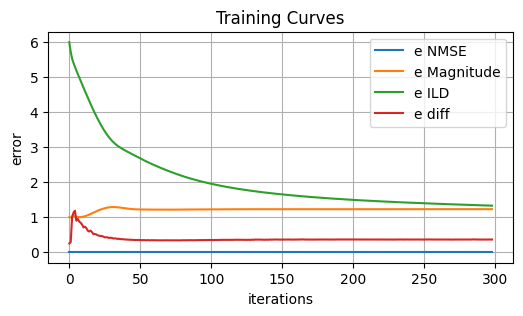

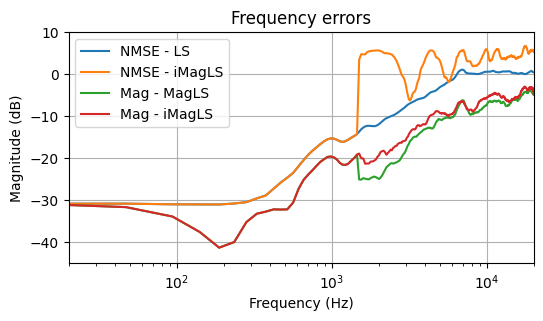

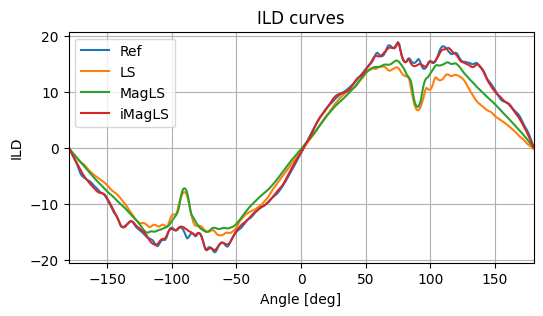

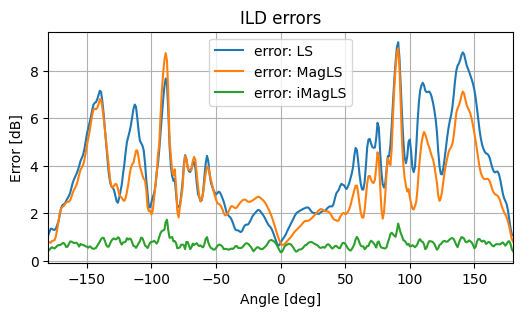

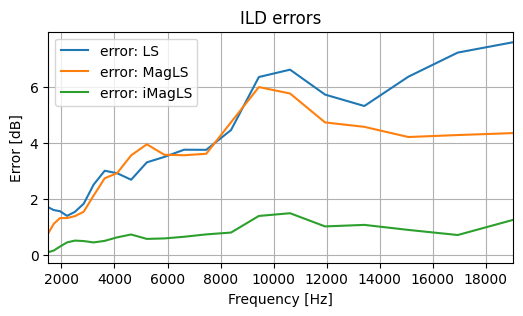

Done


In [1]:
import local_functions as lf
import os
import gdown


base_dir  = os.path.join('.')
data_path = os.path.join(base_dir, "results/")
os.makedirs(data_path, exist_ok=True)

matlab_data_path = os.path.join(data_path, "pytorch_data.mat")

# Google Drive download if the file is missing
if not os.path.exists(matlab_data_path):
    print("Downloading pytorch_data.mat from Google Drive...")
    gdown.download(
        url="https://drive.google.com/uc?id=1s-7clO7Ddq30HVIpt0G6XRIUsKxGCoeW",
        output=matlab_data_path,
        quiet=False
    )
    

shutup  = False
is_save = True

# lambda[0] = NMSE
# lambda[1] = Magnitude
# lambda[2] = Masked Magnitude
# lambda[3] = ILD
# lambda[4] = mag diff
epochs = 500
lr = 0.0005
lambda_vec  = [0,1,6, 0.25] # ratio
lf.start(lambda_vec, epochs, lr, data_path, shutup, is_save)
lf.plot_results_graphs_via_m_file(data_path, shutup, is_save)

print("Done")